In [1]:
import pybrain
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.core.format.set_option('notebook_repr_html',True)

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

%matplotlib inline

# Quick and Dirty Introduction to Neural Networks

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## Artificial Neuron

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/600px-ArtificialNeuronModel_english.png" >

$$o_j^{(n)} = \varphi\left(\sum_{i\; in\; layer (n-1)}w_{ij}o_i^{(n-1)} \right)$$

## Step activation function
<img src="https://c.mql5.com/2/4/act1.png" align="middle">

## Logistic activation function

$$\varphi(x) = \frac{1}{1 - e^{-(x-b)}}$$

<img width= 300 src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/SigmoidFunction.png/400px-SigmoidFunction.png" align="middle">

### Question: How to program an artificial neuron to calculate the *and* function?

<br>
<table>
<tr>
<th>$X$</th>
<th>$Y$</th>
<th>$X$ and $Y$</th>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td style="text-align:center">1</td>
</tr>
</table>

## AND Neural Network

<img width=500 src="2in-neuron.jpg" align="middle">

In [2]:
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(2, 1, outclass=pybrain.SigmoidLayer)
print net.params


[-2.5220252  -2.08707684 -0.65017435]


In [3]:
def print_pred2(dataset, network):
    df = pd.DataFrame(dataset.data['sample'][:dataset.getLength()],columns=['X', 'Y'])
    prediction = np.round(network.activateOnDataset(dataset),3)
    df['output'] = pd.DataFrame(prediction)
    return df

from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
D = UnsupervisedDataSet(2) # define a dataset in pybrain
D.addSample([0,0])
D.addSample([0,1])
D.addSample([1,0])
D.addSample([1,1])
print_pred2(D, net)

,X,Y,output
0,0,0,0.074
1,0,1,0.040
2,1,0,0.010
3,1,1,0.005


## AND Neural Network
<img width=500 src="2in-neuron.jpg" align="middle">

In [4]:
net.params[:] = [-100, 60,  60]
print_pred2(D, net)

,X,Y,output
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


### Question: How to program an artificial neuron to calculate the *xor* function?
<br/>
<table>
<tr>
<th>$X$</th>
<th>$Y$</th>
<th>$X$ xor $Y$</th>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td style="text-align:center">0</td>
</tr>
</table>

## Plotting the NN Output

In [5]:
def plot_nn_prediction(N): 
    # a function to plot the binary output of a network on the [0,1]x[0,1] space
    x_list = np.arange(0.0,1.0,0.025)
    y_list = np.arange(1.0,0.0,-0.025)    
    z = [0.0 if N.activate([x,y])[0] <0.5 else 1.0  for y in y_list for x in x_list]
    z = np.array(z)
    grid = z.reshape((len(x_list), len(y_list)))
    plt.imshow(grid, extent=(x_list.min(), x_list.max(), y_list.min(), y_list.max()),cmap=plt.get_cmap('Greys_r'))
    plt.show()

## Plotting the NN Output

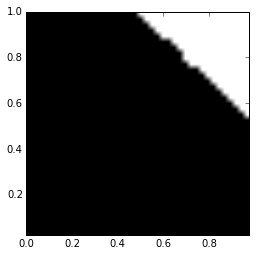

In [6]:
net.params[:] = [-30, 20, 20]
plot_nn_prediction(net)

<br/>
<br/>
## Answer: It is impossible with only one neuron!
<br/>
<br/>   

  
## We need to use more than one neuron....

## Multilayer Neural Network
<img src="http://www.cs.nott.ac.uk/~gxk/courses/g5aiai/006neuralnetworks/images/ffnet.jpg">

## Learning an XOR NN

In [9]:
Dtrain = SupervisedDataSet(2,1) # define a dataset in pybrain
Dtrain.addSample([0,0],[0])
Dtrain.addSample([0,1],[1])
Dtrain.addSample([1,0],[1])
Dtrain.addSample([1,1],[0])

from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(2, 2, 1, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)
T = BackpropTrainer(net, learningrate=0.1, momentum=0.9)
T.trainOnDataset(Dtrain, 1000)
print_pred2(D, net)

,X,Y,output
0,0,0,0.075
1,0,1,0.932
2,1,0,0.931
3,1,1,0.082


## XOR NN Output Plot

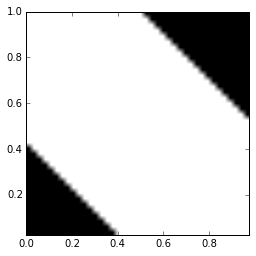

In [10]:
plot_nn_prediction(net)

## The Little Red Riding Hood Neural Network

<img src="http://themaleharem.com/wp-content/uploads/2014/06/Walter-crane-little-red-riding-hood-meets-the-wolf-in-the-woods.jpg">

## LRRH Network Architecture

<img src="lrrh net.jpg">

## Training


In [11]:
from pybrain.tools.validation import Validator

validator =  Validator()
Dlrrh = SupervisedDataSet(4,4) 
Dlrrh.addSample([1,1,0,0],[1,0,0,0])
Dlrrh.addSample([0,1,1,0],[0,0,1,1])
Dlrrh.addSample([0,0,0,1],[0,1,1,0])
df = pd.DataFrame(Dlrrh['input'],columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
print df.join(pd.DataFrame(Dlrrh['target'],columns=['Scream', 'Hug', 'Food', 'Kiss']))
net = buildNetwork(4, 3, 4, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)


   Big Ears  Big Teeth  Handsome  Wrinkled  Scream  Hug  Food  Kiss
0         1          1         0         0       1    0     0     0
1         0          1         1         0       0    0     1     1
2         0          0         0         1       0    1     1     0


## Backpropagation

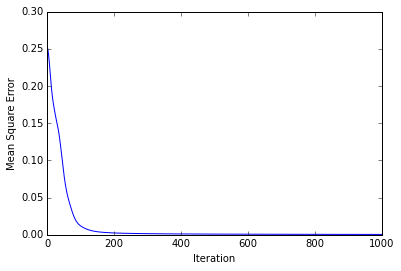

In [12]:
T = BackpropTrainer(net, learningrate=0.01, momentum=0.99)
scores = []
for i in xrange(1000):
    T.trainOnDataset(Dlrrh, 1)
    prediction = net.activateOnDataset(Dlrrh)
    scores.append(validator.MSE(prediction, Dlrrh.getField('target')))
plt.ylabel('Mean Square Error')
plt.xlabel('Iteration')
plt.plot(scores)


## Prediction

In [13]:
def lrrh_input(vals):
    return pd.DataFrame(vals,index=['big ears', 'big teeth', 'handsome', 'wrinkled'], columns=['input'])

def lrrh_output(vals):
    return pd.DataFrame(vals,index=['scream', 'hug', 'offer food', 'kiss cheek'], columns=['output'])

In [14]:
in_vals = [1, 1, 0, 0]
lrrh_input(in_vals)

,input
big ears,1
big teeth,1
handsome,0
wrinkled,0


In [15]:
lrrh_output(net.activate(in_vals))

,output
scream,0.974041
hug,0.012200
offer food,0.027303
kiss cheek,0.027840
